In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1080 (UUID: GPU-a1187528-6115-ab79-3545-beef871aae6d)


## Get a text dataset

In [2]:
import zipfile

def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2024-04-15 18:21:35--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:401b:800::201b, 2a00:1450:401b:808::201b, 2a00:1450:401b:80d::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:401b:800::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.3’

nlp_getting_started 100%[===================>] 593.11K  1022KB/s    in 0.6s    

2024-04-15 18:21:36 (1022 KB/s) - ‘nlp_getting_started.zip.3’ saved [607343/607343]



## Visualizing a text dataset

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df["text"][:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [6]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
len(train_df), len(test_df)

(7613, 3263)

In [10]:
import random

random_index = random.randint(0, len(train_df)-5)  # Create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
    _, text, target = row
    print(f"Target {target}", "(real disaster)" if target > 0 else "(not real diaster)")
    print(f"Text:\n{text}\n")
    print(f"---\n")

Target 0 (not real diaster)
Text:
'When you walk away
Nothing more to say
See the lightning in your eyes
See Û÷em running for their lives'

---

Target 0 (not real diaster)
Text:
On page 500 of 688 of After We Collided by Anna Todd http://t.co/Y7PetO0DX2

---

Target 1 (real disaster)
Text:
The number of security officials killed by PKK in terror attacks since the Suruc suicide bombing has reached 22 https://t.co/OpJwuNUvG8

---

Target 1 (real disaster)
Text:
OUN cancels Severe Thunderstorm Warning for Lincoln Logan Oklahoma [OK]  http://t.co/bTi8JAMFiu #WX

---

Target 1 (real disaster)
Text:
Remembering Mordechai Yehuda Friedman 24 of Ramat Beit Shemesh; murdered by Hamas terrorists in the suicide bombing of Egged bus No. 361

---



### Split data into trianing and validation sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Text vectorization (tokenization)

In [15]:
import tensorflow as tf
print(tf.__version__)

2024-04-15 18:21:39.354158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:21:39.354251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:21:39.424797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 18:21:39.605312: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 18:21:41.958775: W tensorflow/compiler/tf2

2.15.0


In [16]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                 standardize="lower_and_strip_punctuation",
                                 split="whitespace",
                                 ngrams=None,
                                 output_mode="int",  # how to map tokens to numebers
                                 output_sequence_length=None)

2024-04-15 18:21:45.127107: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 18:21:45.390629: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 18:21:45.391013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
# Find average number of tokens
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [18]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
sample_sentence = "There's a Wall Street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 264,    3, 1104,  698,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [21]:
# Chose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
\n\nVectorized version:\n {text_vectorizer([random_sentence])}")

Original text:
and he almost collapsed bc he said his wish came true moderately FUCK

Vectorized version:
 [[   7   56  660  439  632   56  205   79 1160  440 1107    1  349    0
     0]]


In [22]:
# Get the unique words in the vocab
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [23]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")
embedding

In [24]:
random_sentence = random.choice(train_sentences)
print(f"Original first word from sentence: {random_sentence}")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original first word from sentence: Experts in France begin examining airplane debris found on Reunion Island http://t.co/LsMx2vwr3J French air accident experts on WednesdayÛ_


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04984394,  0.02121155, -0.0043065 , ...,  0.0003083 ,
         -0.01575177, -0.02109808],
        [ 0.01527805,  0.03632692, -0.04644626, ..., -0.04474684,
          0.00778008, -0.03350057],
        [ 0.0104536 ,  0.01533243,  0.00519353, ...,  0.03655733,
         -0.04072739, -0.02940474],
        ...,
        [ 0.04662572, -0.04568687, -0.00715675, ..., -0.0054579 ,
          0.02452913,  0.01307597],
        [-0.0089711 ,  0.00521518, -0.004031  , ..., -0.04874761,
         -0.01934717, -0.03118907],
        [ 0.01245979, -0.0020479 , -0.04821664, ...,  0.01739231,
         -0.04685343,  0.00261148]]], dtype=float32)>

In [25]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04984394,  0.02121155, -0.0043065 , -0.01440706,  0.0216472 ,
       -0.03972059, -0.01311833,  0.03254678,  0.04868342, -0.02221364,
       -0.0388918 , -0.02299423, -0.02504477, -0.04769634,  0.00631372,
       -0.00622921, -0.0113947 , -0.03281309,  0.04891802,  0.03436686,
       -0.0094076 , -0.02719523, -0.04662349,  0.03711358, -0.01024529,
       -0.03989946, -0.0268012 , -0.02236297, -0.0024734 , -0.04883524,
       -0.0378503 , -0.00297629, -0.01226143,  0.03998527,  0.0358221 ,
       -0.02441738, -0.00579522,  0.02042514,  0.04930827,  0.04947212,
        0.03921602,  0.02782807,  0.02705069,  0.00078201,  0.03436406,
        0.00862755, -0.01950444, -0.04992167, -0.03435974,  0.03534473,
       -0.03212009, -0.00426978, -0.01281372,  0.02721042, -0.00327943,
       -0.04955059, -0.03609421,  0.04597289,  0.04765341, -0.00100421,
       -0.03382906, -0.03789525,  0.0196217 ,  0.03474556,  0.04570566,
       -0.007015

In [26]:
len(sample_embed[0][0])

128

### Following models:
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

### Each experiment will go through the following steps:
* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()), # model the text
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
    Args:
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Return a dictionary of accuracy, precision, recall, f1-score.
    """
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                    "precision": model_precision,
                    "recall": model_recall,
                    "f1": model_f1}
    return model_results

In [31]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [32]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [33]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [36]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240415-182150
Epoch 1/5


2024-04-15 18:21:53.746030: I external/local_xla/xla/service/service.cc:168] XLA service 0x72cc18129780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-15 18:21:53.746069: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-04-15 18:21:53.761745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-15 18:21:54.413846: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713198114.515368  156624 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 [==============================] - 11s 36ms/step - loss: 0.6081 - accuracy: 0.6999 - val_loss: 0.5346 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4404 - accuracy: 0.8199 - val_loss: 0.4685 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3459 - accuracy: 0.8621 - val_loss: 0.4586 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2844 - accuracy: 0.8927 - val_loss: 0.4639 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2375 - accuracy: 0.9121 - val_loss: 0.4766 - val_accuracy: 0.7861


In [37]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7861


[0.47655948996543884, 0.7860892415046692]

In [38]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00477982,  0.00759703,  0.0519014 , ...,  0.02444157,
         -0.05120454,  0.01133547],
        [ 0.04245162,  0.01611822,  0.01474336, ...,  0.03125741,
         -0.0436371 ,  0.00646928],
        [-0.040425  , -0.06939548,  0.06243542, ...,  0.01673174,
         -0.01665067,  0.06195904],
        ...,
        [-0.03895172,  0.02934395, -0.03123707, ..., -0.00446032,
         -0.03850981,  0.01426374],
        [-0.05751142, -0.07540318,  0.02921137, ...,  0.05212268,
         -0.05135228,  0.01447655],
        [-0.03849812, -0.05133777,  0.05240312, ...,  0.01896927,
         -0.08297811,  0.0835397 ]], dtype=float32)>]

In [39]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


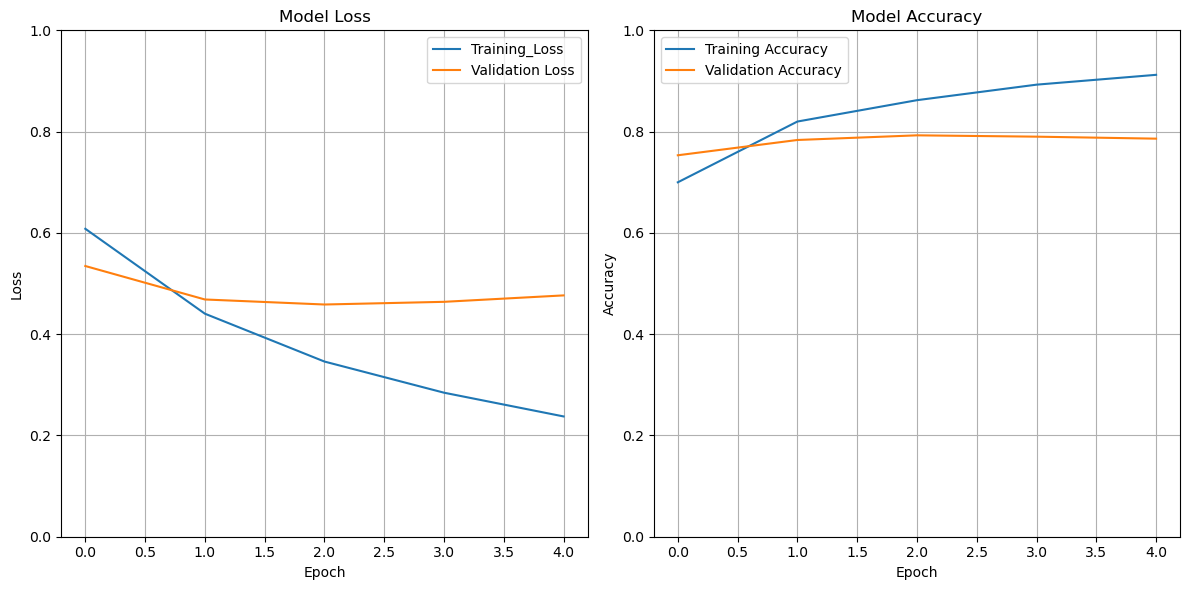

In [40]:
import matplotlib.pyplot as plt

def plot_training_history(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.plot(model_history.history['loss'], label="Training_Loss")
    ax1.plot(model_history.history['val_loss'], label="Validation Loss")
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    ax1.set_ylim(0, 1)
    
    ax2.plot(model_history.history['accuracy'], label="Training Accuracy")
    ax2.plot(model_history.history['val_accuracy'], label="Validation Accuracy")
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
    ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

plot_training_history(model_history=model_1_history)

In [41]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.40179408],
       [0.7444152 ],
       [0.99780244],
       [0.11042344],
       [0.11565205],
       [0.933682  ],
       [0.91040605],
       [0.9929299 ],
       [0.9698713 ],
       [0.27162787]], dtype=float32)

In [42]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [43]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [44]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [45]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
    for key, value in baseline_results.items():
        print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [46]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Get the weight matrix of mebedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [69]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")
# LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)
